<a href="https://colab.research.google.com/github/aswinijena3459/Hotel-Booking-analysis-EDA/blob/main/Hotel_Bookings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Hotel Bookings Analysis

##### **Project Type** - Exploratory Data Analysis
##### **Contribution** - Individual

# **GitHub Link -**

# **Problem Statement-**

This Hotel Bookings data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.Explore and analyze the Hotel Bookings dataset to discover important factors that govern the bookings.

#### **Define Your Business Objective/Business context?**
- Objective is to analyse and understand all kinds of factors governing hotel bookings from both hotel owner and guest point of view.
- Understand what factors a hotel should understand and execute in order to get more guests,decrease booking cancellation and increase its overall hospitality business profits.

# ***Let's Begin !***

#### Importing the dataset from google drive

In [1]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,7)
%matplotlib inline 
import seaborn as sns
import missingno as msno
plt.rcParams['figure.figsize'] = 12,8
# import done to avoid warnings
from warnings import filterwarnings


## ***1. Know Your Data***

In [3]:
## Reading the dataset
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone projects/EDA/Hotel Booking Analysis/Hotel Bookings.csv')# Load Dataset
df ###Dataset first look

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
#### Rows and column count of dataset
df.shape

(119390, 32)

In [5]:
### Dataset complete information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [6]:
### counting the no.of duplicated rows in the dataset
df.duplicated().sum() 

31994

In [7]:
###Deleting the duplicated rows because they are of no use and also no.of duplicatedrows are very high
df.drop_duplicates(inplace= True)

In [8]:
##checking the shape of dataset after deleting duplicates
df.shape

(87396, 32)

#### Missing values/ Null values

In [9]:
# Missing Values/Null Values Count
null_values=df.isnull().sum().sort_values(ascending=False)
null_values[:10]

company                   82137
agent                     12193
country                     452
children                      4
reserved_room_type            0
assigned_room_type            0
booking_changes               0
deposit_type                  0
hotel                         0
previous_cancellations        0
dtype: int64

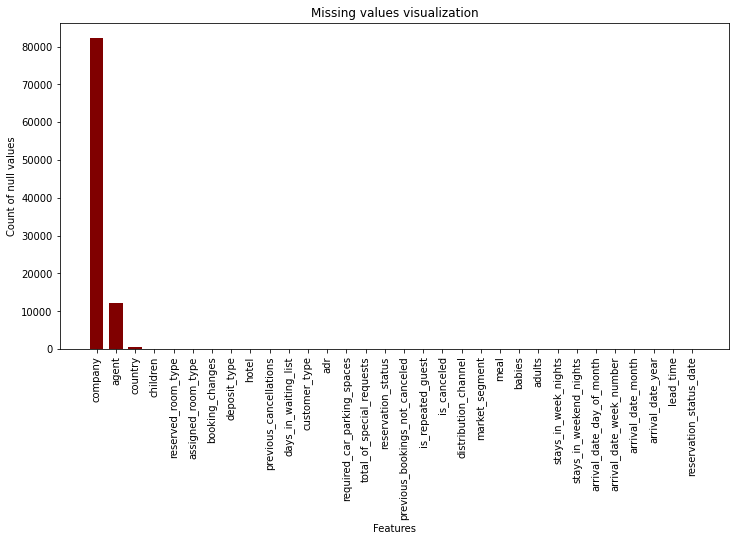

In [10]:
# Visualizing the missing values
features = list(null_values.keys())                      #### x label of bar plot
missing_values_counts = list(null_values.values)         ###  y label of barplot
  
fig = plt.figure(figsize = (12,6 ))
 
# creating the bar plot
plt.bar(features, missing_values_counts, color ='maroon',
        width = 0.7)
plt.xlabel("Features")
plt.ylabel("Count of null values")
plt.title("Missing values visualization")
plt.xticks(features, features, rotation='vertical')
plt.show()

### What did you know about your dataset?

We see that there are 32 columns in the dataframe and some columns like 'children', 'company', 'country' and 'agent' have null values.

This data set contains booking information for a city hotel and a resort hotel and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [12]:
# Statistical summary of dataset
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,75203.000000,5259.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,0.039075,0.030413,0.183990,0.271603,94.138306,183.081384,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,0.193775,0.369145,1.731894,0.727245,113.188172,130.557608,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,47.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,169.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,263.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Variables Description
First of all we will try to understand the meaning of all columns of the dataframe.
For this we will see the unique values attained by each column whose meaning we are unable to understand.

In [13]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [14]:
df['hotel'].unique()
### there are two categories of hotel:- Resort Hotel and city hotel

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [15]:
df['is_canceled'].unique()
### if the booking was cancelled(1) or not(0)

array([0, 1])

In [16]:
df['lead_time'].unique()
### No of days elapsed between the entering date of the booking into the pms and arrival date

array([342, 737,   7,  13,  14,   0,   9,  85,  75,  23,  35,  68,  18,
        37,  12,  72, 127,  78,  48,  60,  77,  99, 118,  95,  96,  69,
        45,  40,  15,  36,  43,  70,  16, 107,  47, 113,  90,  50,  93,
        76,   3,   1,  10,   5,  17,  51,  71,  63,  62, 101,   2,  81,
       368, 364, 324,  79,  21, 109, 102,   4,  98,  92,  26,  73, 115,
        86,  52,  29,  30,  33,  32,   8, 100,  44,  80,  97,  64,  39,
        34,  27,  82,  94, 110, 111,  84,  66, 104,  28, 258, 112,  65,
        67,  55,  88,  54, 292,  83, 105, 280, 394,  24, 103, 366, 249,
        22,  91,  11, 108, 106,  31,  87,  41, 304, 117,  59,  53,  58,
       116,  42, 321,  38,  56,  49, 317,   6,  57,  19,  25, 315, 123,
        46,  89,  61, 312, 299, 130,  74, 298, 119,  20, 286, 136, 129,
       124, 327, 131, 460, 140, 114, 139, 122, 137, 126, 120, 128, 135,
       150, 143, 151, 132, 125, 157, 147, 138, 156, 164, 346, 159, 160,
       161, 333, 381, 149, 154, 297, 163, 314, 155, 323, 340, 35

In [17]:
df['arrival_date_year'].unique()
### year of arrival date

array([2015, 2016, 2017])

In [18]:
df['arrival_date_month'].unique()
### month of arrival date

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [19]:
df['arrival_date_week_number'].unique()
### week number for arrival date

array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26])

In [20]:
df['arrival_date_day_of_month'].unique()
###day of arrival date

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [21]:
df['stays_in_weekend_nights'].unique()
###number of weekend nights(saturday,sunday) the guest booked to stay

array([ 0,  1,  2,  4,  3,  6, 13,  8,  5,  7, 12,  9, 16, 18, 19, 10, 14])

In [22]:
df['stays_in_week_nights'].unique()
##the no of weeknights (monday to friday) the guest booked to stay

array([ 0,  1,  2,  3,  4,  5, 10, 11,  8,  6,  7, 15,  9, 12, 33, 20, 14,
       16, 21, 13, 30, 19, 24, 40, 22, 42, 50, 25, 17, 32, 26, 18, 34, 35,
       41])

In [23]:
df['adults'].unique()
###the no of adults 

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

In [24]:
df['children'].unique()
###the no of babies 

array([ 0.,  1.,  2., 10.,  3., nan])

In [25]:
df['meal'].unique()
##kind of meal opted for

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [26]:
df['country'].unique() ####country code

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [27]:
df['market_segment'].unique()
###which segment the customer belongs to

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [28]:
df['distribution_channel'].unique()
#### how the customer accessed the stay

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [29]:
df['is_repeated_guest'].unique()###is the customer coming for the first time(0) or not(1)

array([0, 1])

In [30]:
df['previous_cancellations'].unique()
###no of of cancellations made before

array([ 0,  1,  2,  3, 26, 25, 14,  4, 24, 19,  5, 21,  6, 13, 11])

In [31]:
df['previous_bookings_not_canceled'].unique()
###no of non cancelled bookings of the customer

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 19, 26, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72])

In [32]:
df['reserved_room_type'].unique()
###type of room reserved

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [33]:
df['assigned_room_type'].unique()
###type of room asigned

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [34]:
df['booking_changes'].unique()
###count of changes made to booking

array([ 3,  4,  0,  1,  2,  5, 17,  6,  8,  7, 10, 16,  9, 13, 12, 20, 14,
       15, 11, 21, 18])

In [35]:
 df['deposit_type'].unique() 
 ###deposit type

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [36]:
df['agent'].unique()###booked through agent
       

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [37]:
df['days_in_waiting_list'].unique()
##no of days in waiting list

array([  0,  50,  47,  65, 122,  75, 101, 150, 125,  14,  60,  34, 100,
        22, 121,  61,  39,   5,   1,   8, 107,  43,  52,   2,  11, 142,
       116,  13,  44,  97,  83,   4, 113,  18,  20, 185,  93, 109,   6,
        37, 105, 154,  64,  99,  38,  48,  33,  77,  21,  80,  59,  40,
        58,  89,  53,  49,  69,  87,  91,  57, 111,  79,  98,  85,  63,
        15,   3,  41, 224,  31,  56, 187, 176,  71,  55,  96, 236, 259,
       207, 215, 160, 120,  30,  32,  27,  62,  24, 108, 147, 379,  70,
        35, 178, 330, 223, 174, 162, 391,  68, 193,  10,  76,  16,  28,
         9, 165,  17,  25,  46,   7,  84, 175, 183,  23, 117,  12,  54,
        26,  73,  45,  19,  42,  72,  81,  92,  74, 167,  36])

In [38]:
df['customer_type'].unique()
##type of customer

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [39]:
df['adr'].unique()
##Average daily rate is the measure of the average paid for rooms sold in a given time period. 

array([  0.  ,  75.  ,  98.  , ..., 266.75, 209.25, 157.71])

In [40]:
df['required_car_parking_spaces'].unique() ###no of car parking required for guests

array([0, 1, 2, 8, 3])

In [41]:
df['total_of_special_requests'].unique()
    ###no of special request made

array([0, 1, 3, 2, 4, 5])

In [42]:
df['reservation_status'].unique() 
###status of reservation

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [43]:
df['reservation_status_date'].unique()
###date of specific status

array(['2015-07-01', '2015-07-02', '2015-07-03', '2015-05-06',
       '2015-04-22', '2015-06-23', '2015-07-05', '2015-07-06',
       '2015-07-07', '2015-07-08', '2015-05-11', '2015-07-15',
       '2015-07-16', '2015-05-29', '2015-05-19', '2015-06-19',
       '2015-05-23', '2015-05-18', '2015-07-09', '2015-06-02',
       '2015-07-13', '2015-07-04', '2015-06-29', '2015-06-16',
       '2015-06-18', '2015-06-12', '2015-06-09', '2015-05-26',
       '2015-07-11', '2015-07-12', '2015-07-17', '2015-04-15',
       '2015-05-13', '2015-07-10', '2015-05-20', '2015-05-12',
       '2015-07-14', '2015-06-17', '2015-05-01', '2015-03-30',
       '2015-07-19', '2015-06-03', '2015-06-26', '2015-05-14',
       '2015-07-20', '2015-05-07', '2015-05-28', '2015-04-13',
       '2015-03-25', '2015-07-21', '2015-06-27', '2015-07-18',
       '2015-07-23', '2015-06-08', '2015-06-22', '2015-06-24',
       '2015-03-05', '2015-06-01', '2015-04-24', '2015-07-22',
       '2015-05-27', '2015-04-06', '2015-04-11', '2015-

## 3. ***Data Wrangling***


### **Cleaning data**
- Analysis and algorithms are only as good as the data they’re based on. On average, organizations believe that nearly 30% of their data is inaccurate. This dirty data costs companies 12% of their overall revenue — and they’re losing more than just money. Cleansing produces consistent, structured, accurate data, which allows for informed, intelligent decisions. It also highlights areas for improvement in upstream data entry and storage environments, saving time and money now and in the future.

- While cleaning data we will perform following steps: 
1. Remove duplicate rows (which we have already done above)
2. Handling missing values. 
3. Adding important columns/ Creating important columns
4. Checking for outliers and imputation of outliers
5.  Data Preparation (Convert columns to appropriate datatypes. (Categorial to Numerical))

In [44]:
##lets create a copy of the original dataframe so our original dataset remains unchanged
df1=df.copy()
df1.shape ###shape after dropping duplicates

(87396, 32)

#### Step 2 - Handling missing values

In [45]:
df1.isnull().sum().sort_values(ascending = False)[:5]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
dtype: int64

In [46]:
df['company'].value_counts() ### checking value counts of different company ids

40.0     851
223.0    503
45.0     238
153.0    206
154.0    133
        ... 
10.0       1
419.0      1
415.0      1
425.0      1
534.0      1
Name: company, Length: 352, dtype: int64

In [47]:
df['agent'].value_counts()   ### checking value_counts of different agent ids

9.0      28759
240.0    13028
14.0      3349
7.0       3300
250.0     2779
         ...  
497.0        1
337.0        1
510.0        1
165.0        1
449.0        1
Name: agent, Length: 333, dtype: int64

In [48]:
df['country'].value_counts()   ###checking value counts of different country codes

PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: country, Length: 177, dtype: int64

In [49]:
df['children'].value_counts()  ###checking value counts of children column

0.0     79028
1.0      4695
2.0      3593
3.0        75
10.0        1
Name: children, dtype: int64

1. **company and agents column** has the big no of null values , we could have deleted it also but after checking the value counts it feels like still can be helpfull. Some particular company and agents are producing good no of customers
So we will fill the null values with 0
2. **Country column** is a categorical feature so we will replace it with the mode value. The mode value is the value that appears more than any other value. So, in this case, I am replacing it with the country that appears the most often.
3. **Children column** has very less null and contains the count of children.It also has 0 children category. so we will replace all the missing values with the rounded mean value

In [50]:
df1[['company','agent']] = df1[['company','agent']].fillna(0)  ###filling null values with 0
df1['children'].fillna(df1['children'].mean(), inplace = True) ###filling null values with mean value



In [51]:
df['country'].mode()[0] ###checking for best datatype to fill values

'PRT'

In [52]:
df1['country'].fillna(df1['country'].mode()[0],inplace=True)   ### filling null values with mode value

In [53]:
df1.isnull().sum()  ###checking if any null values are still left or not

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

Now null values are eliminated but we still check for any dirty data or some data which cant be true ,which can make our analysis wrong.
we will use a trial and error method to search for such controversial columns/data .

In [54]:
pd.set_option('display.max_columns', None)  ### to see all the columns of the dataset which will make our analysis easier
df1.head()  ###lets see our data for more refinement/manipulation

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Step 2- Creating important columns

In [55]:
df1['stays_in_week_nights'] + df1['stays_in_weekend_nights'] ###checking for if any zero duration stays

0         0
1         0
2         1
3         1
4         2
         ..
119385    7
119386    7
119387    7
119388    7
119389    9
Length: 87396, dtype: int64

In [56]:
df1[df1['stays_in_weekend_nights']+df1['stays_in_week_nights']==0].shape  ###checking for if any zero duration stays

(651, 32)

In [57]:
df1[df1['stays_in_weekend_nights']+df1['stays_in_week_nights']+df1['adults'] + df1['children'] + df1['babies']==0].shape

(60, 32)

In [58]:
df1[df1['adults'] + df1['children'] + df1['babies']==0].shape   
####there are some rows where total no of adults ,babies, children are zero , which is not possible

(166, 32)

- Looks like there is something fishy here. So we will drop the rows where total no of adults, children, babies are zero.
- Not doing anything with weeknight and weekend night stay columns right now.

In [59]:
df1.shape ###current shape of dataset

(87396, 32)

In [60]:
df1.drop(df1[df1['adults'] + df1['children'] + df1['babies']==0].index, inplace=True )  
### dropping those rows where total no of adults ,babies, children are zero , which is not possible


In [61]:
### Lets check the datatypes of the columns because inappropriate data types can hinder our coding
df1.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

- Here everything seems fine except children, company, agent column which can be int data type

- Reservation status date should not be an object datatype, it should be in date time format 

In [62]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
df1[['children', 'company', 'agent']] = df1[['children', 'company', 'agent']].astype('int64')

In [63]:
# changing datatype of column 'reservation_status_date' to data_type.
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'], format = '%Y-%m-%d')

We need to create some new columns which will carry information of more than one columns like 'total_stay' and 'total_people'

In [64]:
# Adding total staying days in hotels.This column will be our one main weapons of analysis
df1['total_stay'] = df1['stays_in_weekend_nights']+df1['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
df1['total_people'] = df1['adults']+df1['children']+df1['babies']

In [65]:
df1.drop(['adults','children','babies','stays_in_weekend_nights','stays_in_week_nights'],axis=1,inplace=True) ###Dropping old columns

## Step 3 - Checking for outliers in the dataset

In [66]:
### creating a list of suspected continous variables where otliers could be found
features=['lead_time','booking_changes','days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'total_stay','total_people']

- Using boxplot, and summary statistics are best way to visualize outliers . Because it shows clearly how much data is present beyond upper and lower fence in case of box plot.
- And in case of summary statistics we can check the difference between 75th percentile value and max value, 25th percentile value and min value to get an idea about presence of outliers 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

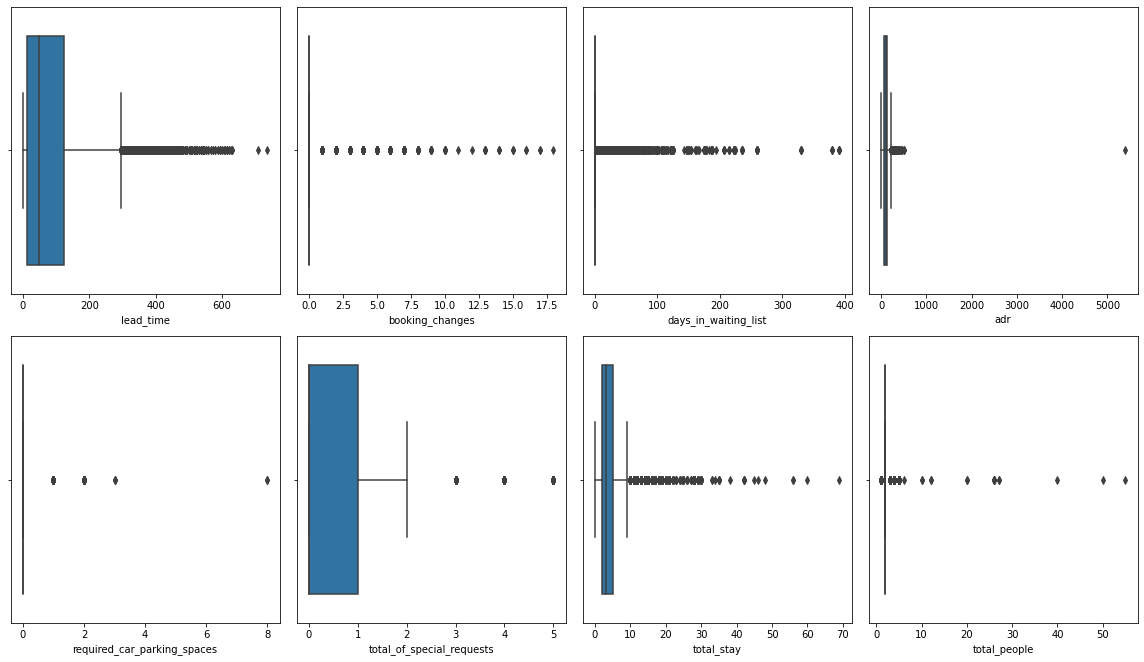

In [67]:
### Checking boxplot for detecting outliers 
n = 1
plt.figure(figsize=(16,18))
for feature in features:
    plt.subplot(4,4,n)
    sns.boxplot(df1[feature])
    n+=1
    plt.tight_layout()

In [68]:
### checking summary statistics of features
df1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_stay,total_people
count,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000
mean,0.275238,79.971019,2016.210352,26.835091,15.815832,0.038565,0.030402,0.184054,0.268497,81.089258,10.984948,0.746291,106.518031,0.084306,0.698934,3.628534,2.029107
std,0.446637,86.058683,0.686064,13.669216,8.835545,0.192556,0.369344,1.733033,0.710633,109.977255,53.956668,10.001001,54.891227,0.281659,0.832051,2.742948,0.790141
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.250000,0.000000,0.000000,2.000000,2.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.200000,0.000000,0.000000,3.000000,2.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,0.000000,134.100000,0.000000,1.000000,5.000000,2.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,69.000000,55.000000


- We should also check the distribution of the data of selected features using a distplot so that we can select the method of treatment of outliers.
- If the distribution follows a pattern simmilar to gaussian normal distribution then we will consider the data points outside 3rd standard deviation as outliers .
- If the distribution is skewed then data points outside (+-) 3 * inter quartile range will be considered as outliers

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

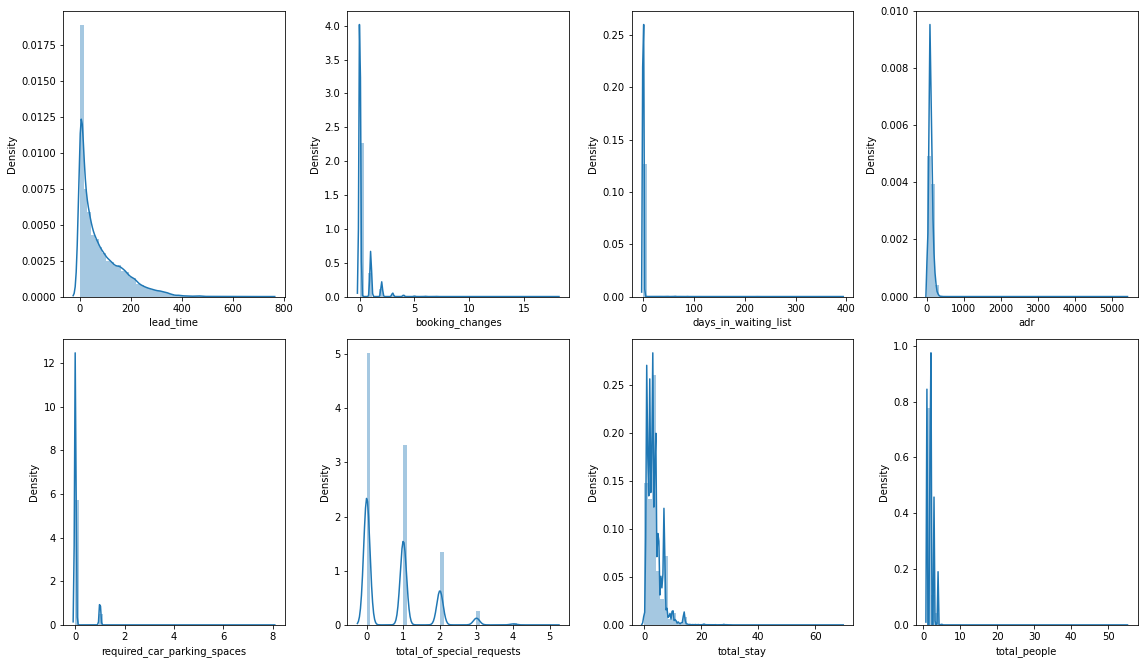

In [69]:
### Checking distplot for understanding the distribution of data 
n = 1
plt.figure(figsize=(16,18))
for feature in features:
    plt.subplot(4,4,n)
    sns.distplot(df1[feature])
    n+=1
    plt.tight_layout()

**What is/are the insight(s) found from the chart?**

From distplot and summary statistics we understand that lead_time and adr follow a distribution somewhat simillar to normal distribution.
Every other variables have a skewed distribution of data points 

###Outlier Treatment of lead_time and adr variable.

In [70]:
###Creating a function to get the upper limit and lower limit of lead_time and adr variable
def limits(variable) :
    mean=df1[variable].mean()
    stan_dev=df1[variable].std()
    lower_bound=mean - 3 * stan_dev
    upper_bound=mean + 3 * stan_dev
    return lower_bound, upper_bound
    





In [71]:
###Applying limits  function that i have creatde to get the lower limit and upper limit for adr variable
print('Lower limit of adr variable:',limits('adr')[0])
print('Upper limit of adr variable:',limits('adr')[1])


Lower limit of adr variable: -58.15565006765668
Upper limit of adr variable: 271.1917115144067


In [72]:
###Applying limits  function that i have creatde to get the lower limit and upper limit for lead_time variable
print('Lower limit of lead_time variable:',limits('lead_time')[0])
print('Upper limit of lead_time variable:',limits('lead_time')[1])

Lower limit of lead_time variable: -178.20503036042493
Upper limit of lead_time variable: 338.1470686500042


We will treat every data point of adr variable outside 0 - 262 range as an outlier and every data point of lead_time variable outside 0 - 338 range as an outlier.

In [73]:
df1.loc[df1['lead_time'] > 338,'lead_time'] = 338  ###replacing outliers greater than 338 with 338
df1.loc[df1['adr'] > 262,'adr'] = 262       ##replacing outliers greater than 338 with 271  
df1.loc[df1['adr'] < 0,'adr'] = 0       ##replacing outliers less than 0 with 0  


Figuring out outliers for Total_people column is a little bit tricky because we have created this column by adding babies , adults, children column.
So we will use limits function first see the extreme points of distribution

In [74]:
###Applying limits  function that i have creatde to get the lower limit and upper limit for total_people variable
print('Lower limit of total_people variable:',limits('total_people')[0])
print('Upper limit of total_people variable:',limits('total_people')[1])

Lower limit of total_people variable: -0.3413169972583736
Upper limit of total_people variable: 4.399530914488684


In [75]:
df1['total_people'].value_counts()  ###Checking the value counts for every unique values

2     57057
1     16072
3     10078
4      3870
5       136
26        5
12        2
27        2
20        2
10        2
40        1
50        1
55        1
6         1
Name: total_people, dtype: int64

In [76]:
df1.loc[df1['total_people'] > 5 ,'total_people'].shape   ###checking for observations more than 5 for total_people

(17,)

There are very less observations in total_people column above 5 numbers.So after checking distplot,summary statistics, histogram for total_people column We will take numbers outside 0-5 range as outliers in total_people column 

In [77]:
df1.loc[df1['total_people'] > 5,'total_people'] = 5    ###replacing outliers greater than 5 with 5

In [78]:
def inter_quartile(variable) :          ####this function is for variables with a skewed distribution
    q1=df1[variable].quantile(0.25)     ####Multiplying IQR with 3 instead of 1.5 to take most extreme points as outliers
    q2=df1[variable].quantile(0.75)
    IQR= q2-q1
    lower_bound=q1 - 3 * IQR
    upper_bound= q2 + 3 * IQR
    return lower_bound, upper_bound

In [79]:
###Applying limits  function that i have creatde to get the lower limit and upper limit for Total_stay variable
print('Lower limit of total_stay variable:',inter_quartile('total_stay')[0])
print('Upper limit of total_stay variable:',inter_quartile('total_stay')[1])

Lower limit of total_stay variable: -7.0
Upper limit of total_stay variable: 14.0


In [80]:
df1['total_stay'].value_counts()

3     17827
1     17169
2     15734
4     13565
7      7520
5      6729
6      3263
10     1072
8      1062
14      859
9       779
0       591
11      367
12      196
13      133
15       69
21       55
28       34
16       33
18       24
19       22
17       20
20       14
25       14
29       13
30       13
22       12
24        6
26        6
23        5
35        5
27        4
42        4
56        2
33        2
60        1
69        1
45        1
38        1
46        1
48        1
34        1
Name: total_stay, dtype: int64

We will take data points greater than 14 and lesser than 1 as ouliers and replace with 14 and 1

In [81]:
df1.loc[df1['total_stay'] >14,'total_stay'] = 14 
df1.loc[df1['total_stay'] <1,'total_stay'] = 1 


Still there are some features where outliers are present .We will do the outlier treatment of those features by analysing distplot, boxplot and summary statistics individually for every feature

In [82]:
####Outlier Treatment
df1.loc[df1['days_in_waiting_list']   >   0,'days_in_waiting_list'  ]=  1
df1.loc[df1['previous_cancellations']   >   1,'previous_cancellations'  ]=  1
df1.loc[df1['previous_bookings_not_canceled']   >   1,'previous_bookings_not_canceled'  ]=  1
df1.loc[df1['booking_changes']   >   1,'booking_changes'  ]=  1
df1.loc[df1['days_in_waiting_list']   >   1,'days_in_waiting_list'  ]=  1
df1.loc[df1['required_car_parking_spaces']   >   1,'required_car_parking_spaces'  ]=  1
df1.loc[df1['required_car_parking_spaces']   >   2,'required_car_parking_spaces'  ]=  2
df1.loc[df1['required_car_parking_spaces']   >   2,'required_car_parking_spaces'  ]=  2





###Now no outliers are present in the data


## Step 4 - Data preparation

We should make some neccessary changes in the dataset which will make our analysis effective, efficient and ready for EDA 

In [83]:
df1.dtypes ###checking for data types of variables 

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type                        object
booking_changes                            int64
deposit_type                              object
agent                                      int64
company                                    int64
days_in_waiting_list

Some Other variables are also present in the dataset which are int64 data types but behaves as categorical features , so it is better if we change its data type to string

In [84]:
df1['is_canceled']=df1['is_canceled'].astype('str')    #### changing datatypes from int64 to string
df1['is_repeated_guest']=df1['is_repeated_guest'].astype('str')
df1['arrival_date_day_of_month']=df1['arrival_date_day_of_month'].astype('str')
df1['arrival_date_year']=df1['arrival_date_year'].astype('str')
df1['arrival_date_week_number']=df1['arrival_date_week_number'].astype('str')
df1['agent']=df1['agent'].astype('str')
df1['company']=df1['company'].astype('str')

In [85]:
df1['is_repeated_guest'].value_counts()   ####checking for categories of feature

0    83866
1     3364
Name: is_repeated_guest, dtype: int64

In [86]:
df1['is_canceled'].value_counts()         ####checking for categories of feature

0    63221
1    24009
Name: is_canceled, dtype: int64

In **'is_canceled'** column we can change the data type of the column to string and rename two categories into cancelled and not_cancelled

In **'is_repeated_guest'** column we can change the data type to string and rename two categories into repeated and not_repeated   

In [87]:
df1['is_canceled']=np.where(df1['is_canceled']== '0' ,'not_cancelled','cancelled')      ###changing the categories to cancelled and not cancelled
df1['is_repeated_guest']=np.where(df1['is_repeated_guest']== '0' ,'not_repeated','repeated')    ###changing the categories to repeated or not repeated

In [88]:
df1.dtypes ### checking for datatypes of variables after making changes


hotel                                     object
is_canceled                               object
lead_time                                  int64
arrival_date_year                         object
arrival_date_month                        object
arrival_date_week_number                  object
arrival_date_day_of_month                 object
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                         object
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type                        object
booking_changes                            int64
deposit_type                              object
agent                                     object
company                                   object
days_in_waiting_list

#**EDA**

#**4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

First of all we need to distinguish between categorical and numerical features to start EDA part.



In [89]:
numerical_features=['previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list',
                       'adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']
                       
categorical_columns=['hotel','is_canceled','arrival_date_year','arrival_date_month','arrival_date_week_number',
 'arrival_date_day_of_month','meal','country','market_segment','distribution_channel','is_repeated_guest',
 'reserved_room_type','assigned_room_type','deposit_type','agent','company','customer_type','reservation_status']                      


##So lets begin the fun exploration part now. we will go though every one by one 

#**Bivariate and Multivariate analysis**

***Hotel Variable***

#### Chart - 1

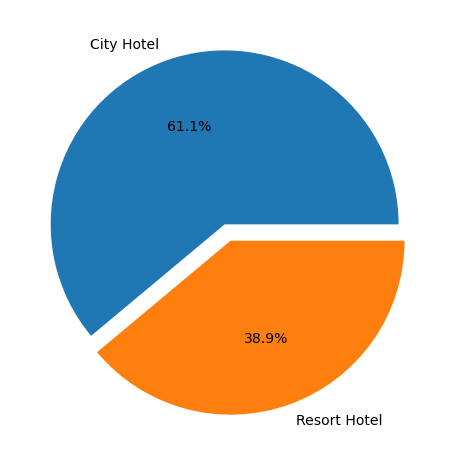

In [90]:
labels=df1['hotel'].value_counts().index    ##labels for pie chart
sizes=df1['hotel'].value_counts().to_list()  ## sizes for pie chart
explode=(0,0.1)
plt.pie(sizes,labels=labels,explode=explode,autopct='%1.1f%%', textprops={'fontsize': 14})    ### plotting the pie chart
plt.show()

**1. Why did you pick the specific chart?**
- Shows clear difference between two types of hotel by mentioning the data in percentage value. 
- Pie charts and bar charts are best for categorical vs numerical analysis|

**2. What is/are the insight(s) found from the chart?**
- No of city hotels 61.1% is greater than resort hotels 38.9% .
- People are prefering city hotels more than resort hotels


**3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.**
- Yes this insights helps creating positive impact. If anyone wants open new branches of its hotel chain then can prefer opening city hotel because they are more popular .

Chart - 2

#**Which type of hotel suffers more cancellations ?**

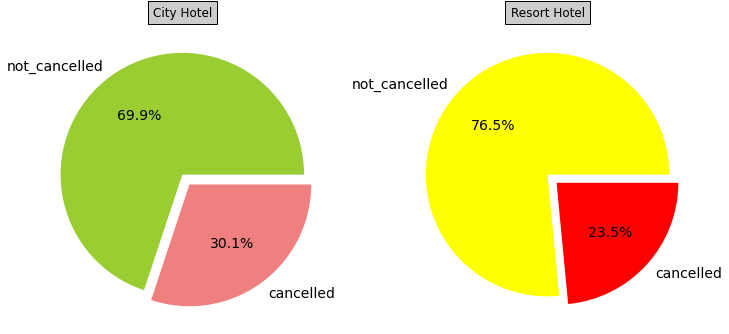

In [91]:
plt.subplot(1,2,1)
labels=df1[df1['hotel']=='City Hotel']['is_canceled'].value_counts(normalize=True).index    ###creating labels for pie chart
sizes=df1[df1['hotel']=='City Hotel']['is_canceled'].value_counts(normalize=True).to_list()  ### size of each labels
explode=(0,0.1)
colors = ['yellowgreen', 'lightcoral']
plt.pie(sizes,labels=labels,explode=explode,autopct='%1.1f%%', textprops={'fontsize': 14},colors=colors)  ###code for pie chart
plt.title("City Hotel", bbox={'facecolor':'0.8', 'pad':5})  ###setting title of pie chart

plt.subplot(1,2,2)
labels=df1[df1['hotel']=='Resort Hotel']['is_canceled'].value_counts(normalize=True).index    ###creating labels for pie chart
sizes=df1[df1['hotel']=='Resort Hotel']['is_canceled'].value_counts(normalize=True).to_list() ### size of each labels
explode=(0,0.1)
colors = ['yellow', 'red']
plt.pie(sizes,labels=labels,explode=explode,autopct='%1.1f%%', textprops={'fontsize': 14},colors=colors) ###code for pie chart
plt.title("Resort Hotel", bbox={'facecolor':'0.8', 'pad':5})

plt.show()

**What is/are the insight(s) found from the chart?**

**We can clearly see here city hotels are getting more cancellations (30.1%) than Resort Hotels (23.5%)** .
- The reason can be that resort hotels may be charging more cancellation fees or advance deposits than city hotels.


#**Which is the preferred hotel for different market segments ?**

Chart - 3

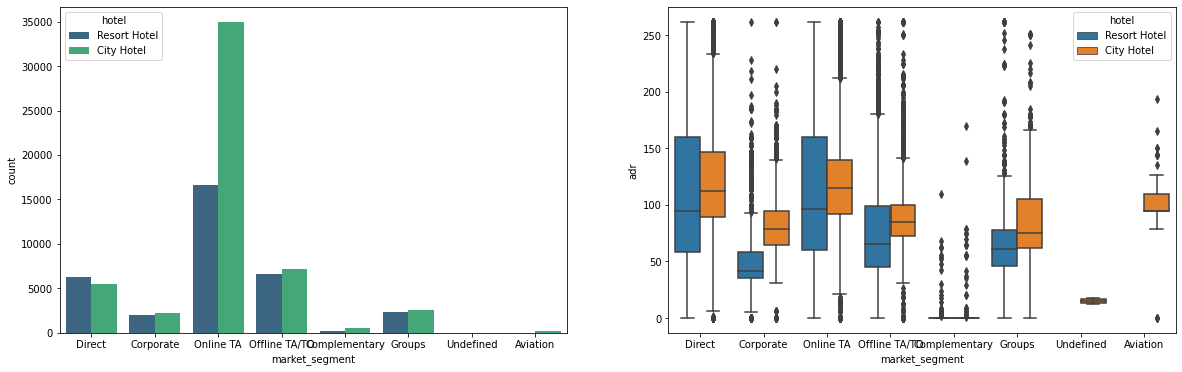

In [92]:
plt.figure(figsize=(20,6))   ### for size of graph
plt.subplot(1,2,1)           ### for more than 1 sub graphs
sns.countplot( x = df1['market_segment'],data=df1, hue='hotel',palette='viridis')    ###plotting a countplot for market segment variable

plt.subplot(1,2,2)         ###for 2nd graph
sns.boxplot(x ='market_segment', y ='adr', data = df1, hue ='hotel') ###plotting a boxplot to understand relationship between adr and 
plt.show()                                                            ### and market segments wrt to hotels

**2.What is/are the insight(s) found from the chart?**
- Hotels are getting most customers thogh online travel agents or operators
- Resort hotels are getting more volume of guests from direct and Online travel agents market segments where the adr is spread between 55 and 155 for most deals
- City hotels are also getting more volume of guests from direct and Online travel agents market segments but there is a clear difference between adr range which is between 80 and 150
- Corporate market segment prefers stay and pay more money  at city hotels little bit more over resort hotels. 
- There is clear and huge difference in terms of adr between Online travel agents and Offline travels agents/operators due to involvement of 3rd party website companies. So people will get cheaper deals with hotels using offline methods
- In case of aviation market segment they book only city hotels may be for flight crew and staffs between flights

#**Which type of room is more popular and which room gives more adr?**

####Chart - 4

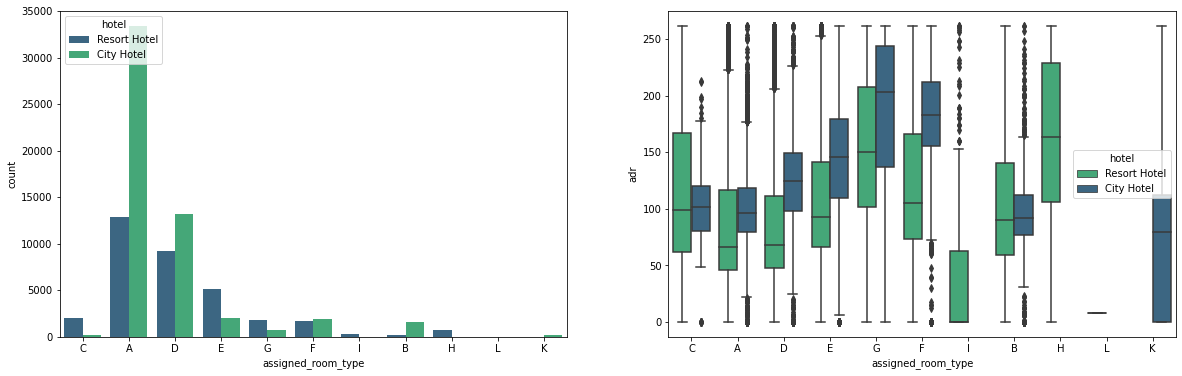

In [93]:
plt.figure(figsize=(20,6))   ### for size of graph
plt.subplot(1,2,1)           ### for more than 1 sub graphs
sns.countplot( x = df1['assigned_room_type'],data=df1, hue='hotel',palette='viridis')    ###plotting a countplot for assigned room type variable

plt.subplot(1,2,2)         ###for 2nd graph
sns.boxplot(x ='assigned_room_type', y ='adr', data = df1, hue='hotel',palette='viridis_r')   ###plotting a boxplot for underdstanding the relationship between
                                                                                              ###assigned room type and adr wrt type of hotels
plt.show()

**2.What is/are the insight(s) found from the chart?**
- A, D, E are top 3 most popular type of rooms for both type of hotels.
- C, G, H are top 3 room type in case of adr for resort hotels.
- K, G, E are top 3 room type in case of adr for city hotels.
- Hotels should focus on increasing those type of rooms who generate more adr.

#**What is preferred stay length in each hotel and how does it affect the adr?**

####Chart - 5

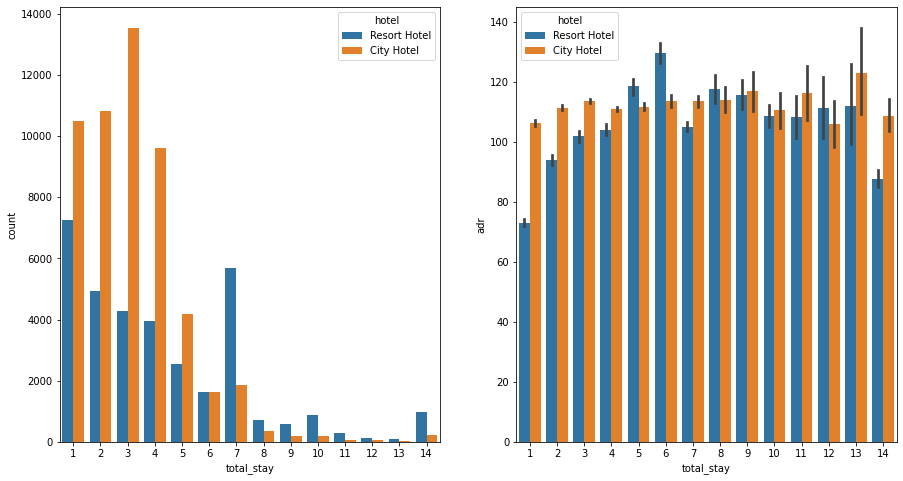

In [94]:
plt.figure(figsize=(15,8))  ### for size of the graph
plt.subplot(1,2,1)  ### for more than 1 sub graphs
sns.countplot(x ='total_stay', data = df1,hue='hotel')   ###plotting a countplot for total_stay column wrt hotels variable

plt.subplot(1,2,2)    ###for 2nd graph
sns.barplot(x ='total_stay', y ='adr', data = df1,hue='hotel')  ###plotting a bar plot to find relationship between total_stay and adr

plt.show()

**What is/are the insight(s) found from the chart?**
- When stay duration is less than 5 days people are preferring city hotels and when duration is more than 6 days people prefer resort hotels.
- one thing to be noted that city hotel has mean adr between 100-120 irrespective of the duration of stay unlike resort hotel where adr varies more depending upon stay duration.

#**Lead_time variable** 

#**which type of hotel has higher mean lead_time ?**

#### Chart - 6

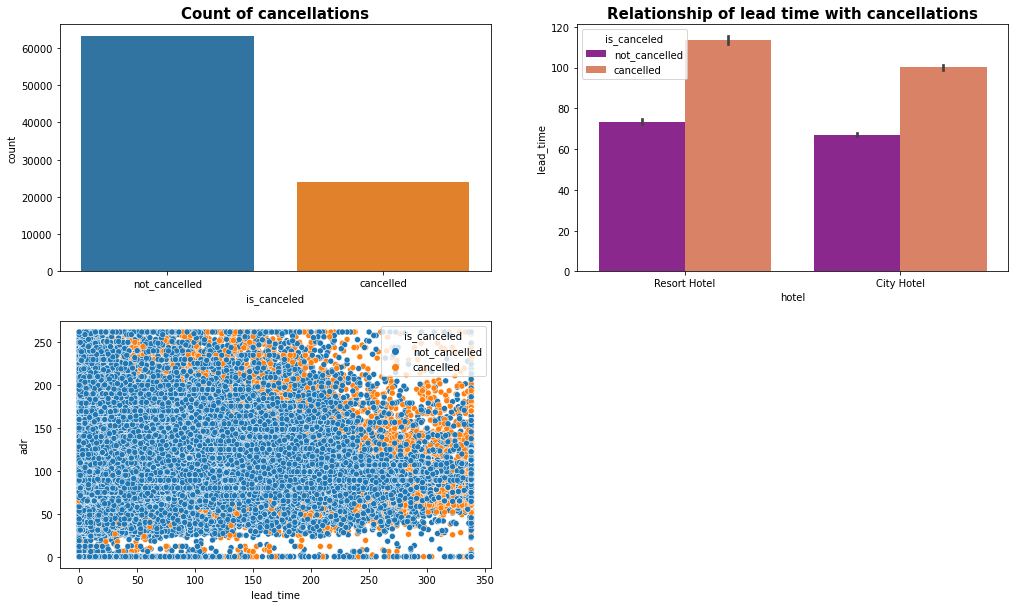

In [95]:
plt.figure(figsize=(17,10))
plt.subplot(2,2,1)
sns.countplot(x='is_canceled',data=df1)   ###plotting a countplot
plt.title('Count of cancellations',fontweight="bold", size=15) 

plt.subplot(2,2,2)
sns.barplot(x ='hotel', y ='lead_time',hue='is_canceled',data = df1, palette ='plasma')  ####getting relationship between hotel, lead_time wrt is_canceled
plt.title('Relationship of lead time with cancellations',fontweight="bold", size=15)

plt.subplot(2,2,3)
sns.scatterplot(x='lead_time', y='adr',hue='is_canceled',data=df1)
plt.show()

**What is/are the insight(s) found from the chart?**
- From above bar chart we can see that resort hotels get more advance bookings or bookings with higher lead time
- Bookings with avg lead time above 80 leads to cancellations
- May be more lead time with resort hotels sometimes lead to cancellations
- From scatterplot we notice that whenever the adr is under 190 and lead time is under 220 there are very rare chance of cancelations.
- Some cancellations are present when adr is below 50 may be due very bad conditions of cheap rooms or sudden cancelation of plan.

#**Is lead_time variable affecting the cancellation of bookings?**

####Chart - 7

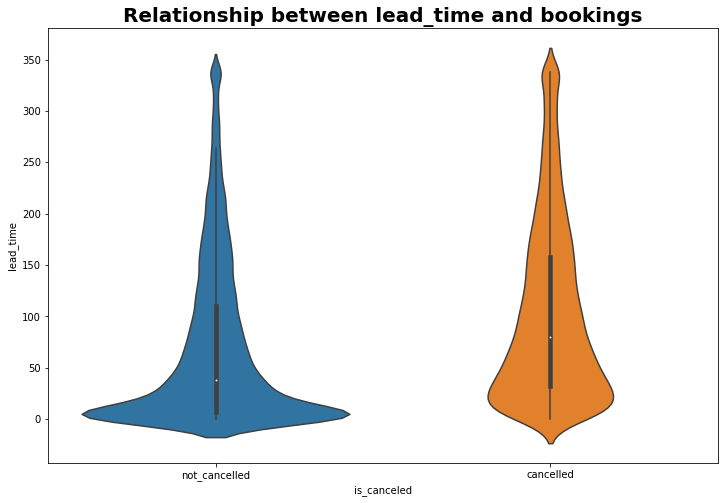

In [96]:
sns.violinplot(x ='is_canceled', y ='lead_time', data = df1, split = True) ###checking the relationship between is_cancelled and lead_time using violin plot
plt.title('Relationship between lead_time and bookings',fontweight='bold',size=20)
plt.show()

**2.What is/are the insight(s) found from the chart?**
- we are getting clear evidence here that bookings with high lead time have more chances of getting cancelled
- Not canceled bookings are having a less mean lead_time

#**what is the role of deposit_type in creating cancellation ?** 

####Chart - 8

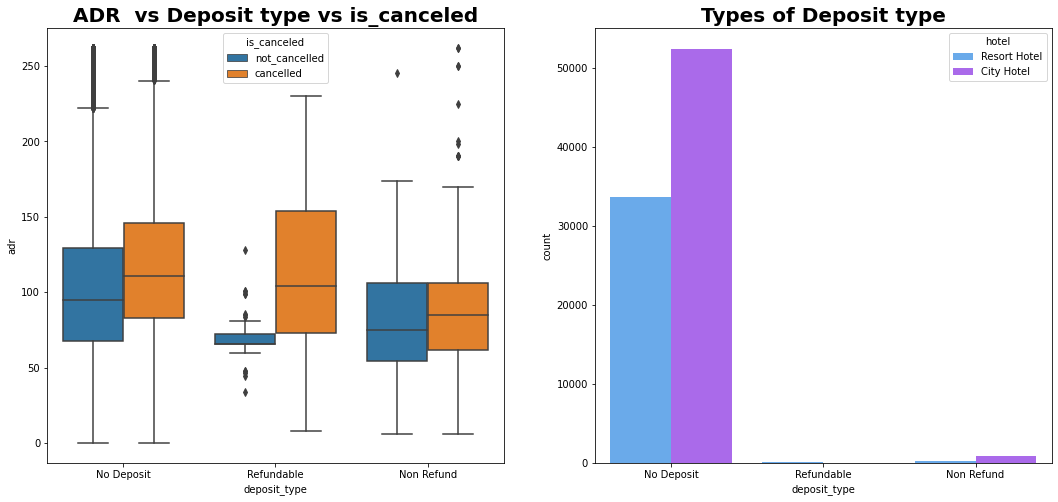

In [97]:
plt.figure(figsize=(18, 8))  ### for size of plot
plt.subplot(1,2,1)  ##for more than 1 sub figure
sns.boxplot(x ='deposit_type', y ='adr', data = df1, hue ='is_canceled') ###plotting a boxplot to understand relationship between adr and 
plt.title('ADR  vs Deposit type vs is_canceled',fontweight="bold", size=20)

plt.subplot(1,2,2)
sns.countplot(data = df1, x = 'deposit_type',hue='hotel', palette='cool')   ###Plotting a countplot for deposit type variable
plt.title('Types of Deposit type',fontweight="bold", size=20)

plt.show()                                                              

**2.What is/are the insight(s) found from the chart?**
- Hotels with no deposit rule are getting nearly 90% of bookings. 
- We are getting clear evidence that refundable type deposits are getting cancelled more often than non refundable deposits
- No deposit bookings are working well and giving good adr also, but it seems bookings with higher price are getting canceled
- There was no deposit for City hotel where as Resorts had some deposits. No deposit may lead to cancel the bookings


##**Country Variable**

In [98]:
top_10_countries=df1['country'].value_counts(normalize=True).head(10)
top_10_countries ###Top ten countries for hotel booking

PRT    0.318721
GBR    0.119500
FRA    0.101146
ESP    0.083045
DEU    0.061733
ITA    0.035091
IRL    0.034564
BEL    0.023856
BRA    0.022848
NLD    0.021896
Name: country, dtype: float64

**2.What is/are the insight(s) found from the chart?**
- Around 30% of all bookings were booked from Portugal followed by Great Britain(10%) & France(8%).

##**arrival_date_year variable**

#**What is the year wise count of hotel bookings and how does it affect adr and cancellations ?**

####Chart - 9

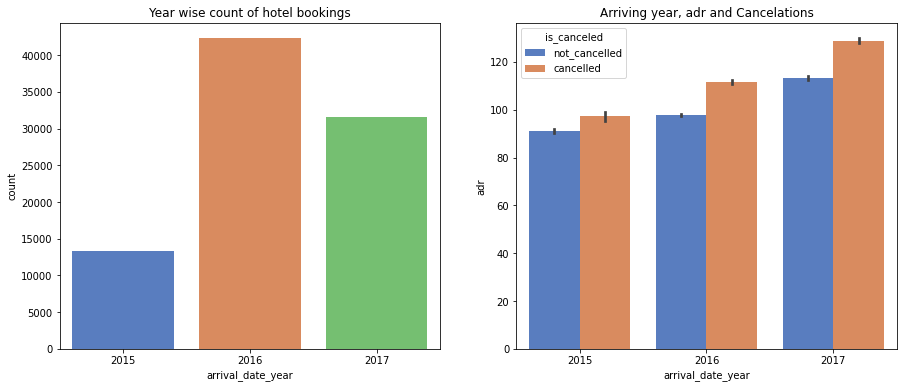

In [99]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(x='arrival_date_year',data= df1, palette='muted')
plt.title('Year wise count of hotel bookings')

plt.subplot(1,2,2)
sns.barplot(x='arrival_date_year', y='adr',hue='is_canceled', data= df1, palette='muted')
plt.title('Arriving year, adr and Cancelations')
plt.show()

**2.What is/are the insight(s) found from the chart?**
- Hotel bookings increased drastically in the year 2016 , then slightly decreased in 2017
- Year wise adr has increased continously in 2017 in comaprision to 2015


#**In what ways market segments changes along the years wrt hotel bookings?**

In [100]:
year_wise_data=df1.groupby(['arrival_date_year', 'market_segment']).count()['hotel'].to_frame(name='booking_counts').reset_index()
year_wise_data   ###created a new dataframe to get the specific info

,arrival_date_year,market_segment,booking_counts
0,2015,Complementary,151
1,2015,Corporate,840
2,2015,Direct,2142
3,2015,Groups,1336
4,2015,Offline TA/TO,3115
5,2015,Online TA,5698
6,2015,Undefined,2
7,2016,Aviation,121
8,2016,Complementary,344
9,2016,Corporate,2127


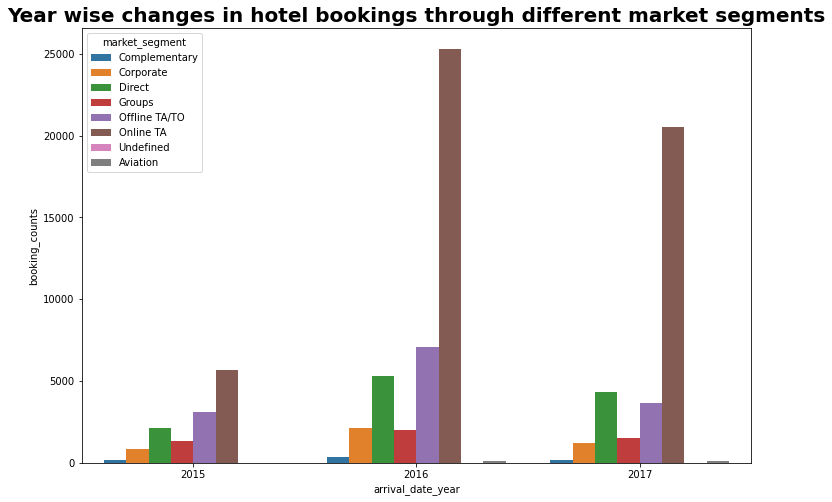

In [101]:
sns.barplot(x='arrival_date_year',y='booking_counts',hue='market_segment',data=year_wise_data) ## bar chart to show year wise changes in market segment
plt.title('Year wise changes in hotel bookings through different market segments', fontweight='bold',size=20)
plt.show()

**2.What is/are the insight(s) found from the chart?**
- Online TA bookings increased by huge numbers in the year 2016 than 2015
- Online boookings increases revenue and helps in marketing also which can indirectly increase direct bookings also.

##**Distribution_channel variable**

#**Which distribution channel brings more customer and ADR among hotels?**

####Chart - 10

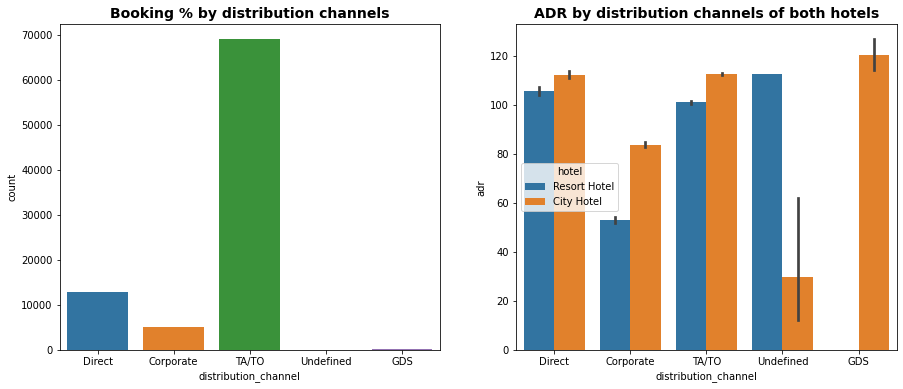

In [102]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(x = 'distribution_channel',data=df1)
plt.title("Booking % by distribution channels", fontweight='bold', fontsize=14);

plt.subplot(1,2,2)
sns.barplot(x = 'distribution_channel', y ='adr',data=df1, hue = 'hotel')
plt.title("ADR by distribution channels of both hotels", fontweight='bold',fontsize=14);

plt.show()

In [103]:
df1['distribution_channel'].value_counts()

TA/TO        69028
Direct       12954
Corporate     5062
GDS            181
Undefined        5
Name: distribution_channel, dtype: int64

**2.What is/are the insight(s) found from the chart?**

-Travel agents/operators bring the most revenue to hotels
-GDS (Global distribution services) channel brings higher revenue generating deals for City hotel, City Hotel can work to increase outreach on GDS channels to get more higher revenue generating deals.

-Resort hotel has more revnue generating deals by direct and TA/TO channel. Resort Hotel need to increase outreach on GDS channel to increase revenue

#**Agent variable**

#**Which is the most efficient agent ?**

In [104]:
df2=df1[df1['is_canceled']=='not_cancelled']   #### dataset with all not cancelled bookings
df2.groupby('agent')['adr'].agg(["min","max","sum","count","mean"]).sort_values('count',ascending=False).head(10)  ##grouping the dataset based on individual agents


,min,max,sum,count,mean
agent,,,,,
9,0.0,262.0,2128149.69,17199,123.736827
0,0.0,262.0,868465.56,10593,81.984854
240,0.0,262.0,883626.69,8084,109.305627
7,0.0,262.0,272435.57,2858,95.323852
14,0.0,262.0,348768.96,2759,126.411366
250,0.0,262.0,296087.81,2285,129.578910
241,0.0,262.0,140175.74,1426,98.299958
28,0.0,262.0,112115.92,1406,79.741053
8,0.0,262.0,106692.25,998,106.906062


####Chart - 11

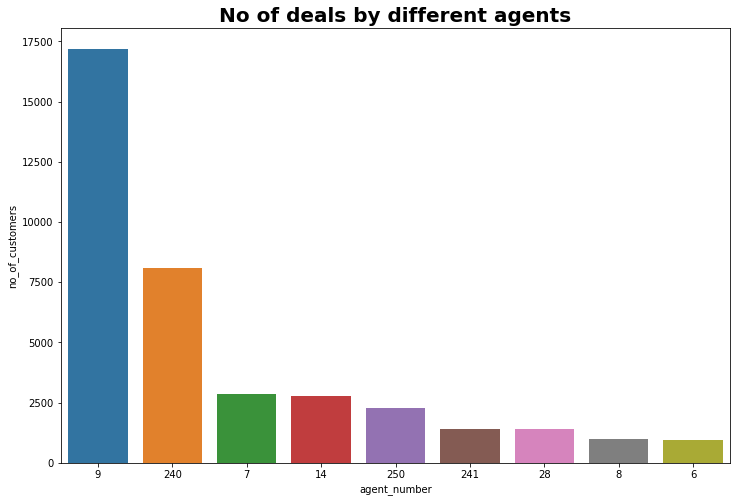

In [105]:
###creating a dataset to find out agent with highest no of customers
agent_data=df2['agent'].value_counts().sort_values(ascending=False).head(10).reset_index().rename(columns={'index':'agent_number',"agent":'no_of_customers'})
###dropping agent no-0 because it represents direct bookings  
agent_data.drop(agent_data[agent_data['agent_number']=='0'].index,inplace=True)
##plotting a barplot for individual agents
sns.barplot(x='agent_number',y='no_of_customers',data=agent_data)
plt.title('No of deals by different agents',fontweight="bold", size=20)  ##title of the chart
plt.show()

**2.What is/are the insight(s) found from the chart?**
- Agent no- 9 has given almost 18,000 customers and revenue worth 21 lakhs to hotels

##**Customer_type variable**

In [106]:
df1['customer_type'].value_counts(normalize=True)  ##Checking percentage of each category in customer type variable

Transient          0.823822
Transient-Party    0.134036
Contract           0.035939
Group              0.006202
Name: customer_type, dtype: float64

- Transient(guest for short time) category is leading this feature by giving 82% customer to hotels followed by Transient -Party(guest for short time but in groups ,maybe for some special occasions)

#**Which customer type gives better revenue to hotels and which type of hotel ?**

####Chart - 12

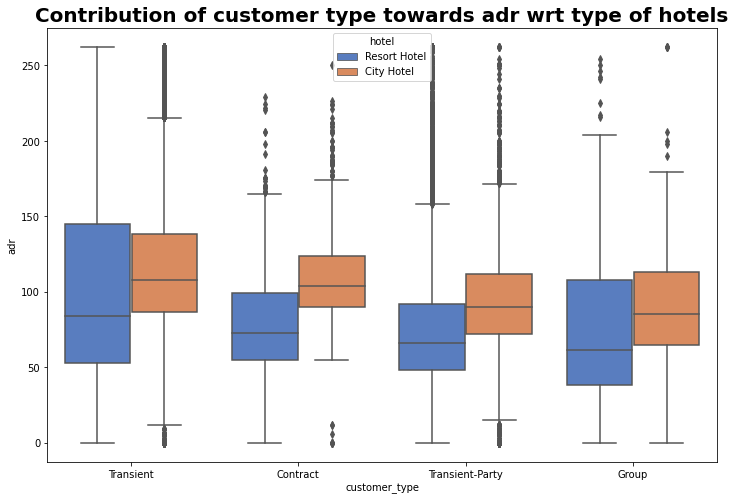

In [107]:
sns.boxplot(x ='customer_type', y ='adr', data = df1, hue ='hotel',palette='muted')  ###plotting a boxplot for customer type and adr column wrt hotel variable
plt.title('Contribution of customer type towards adr wrt type of hotels',fontweight="bold", size=20)
plt.show()

**2.What is/are the insight(s) found from the chart?**
- Mean adr of city hotels is always high in case of all type of customers
- Transient type of customers gives highest adr to city hotels


##**Arrival_date_month variable**

#**which is the best hotel booking season in a year ?**

####Chart - 13

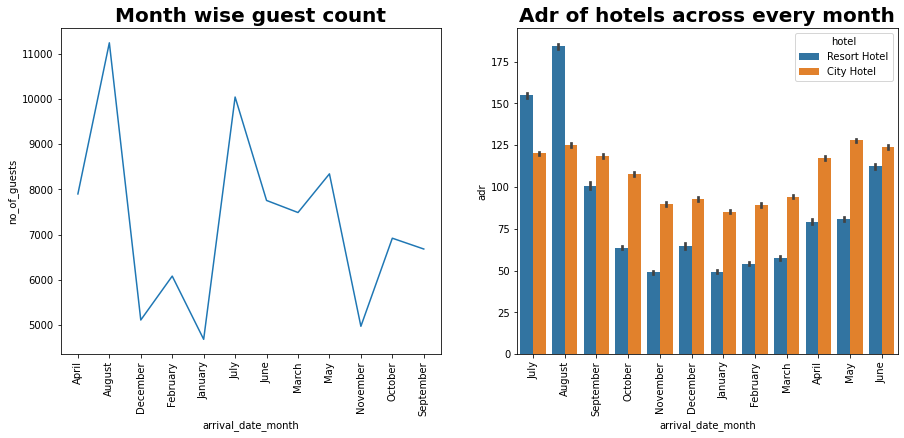

In [108]:
plt.figure(figsize=(15,6))  ###for size of graph
plt.subplot(1,2,1)   ###for more than 1 sub figure
###creating dataframe by grouping by arrival month to get best months
month_wise_data=df1.groupby('arrival_date_month').count()['hotel'].reset_index().rename(columns={'hotel':'no_of_guests'})
sns.lineplot(x='arrival_date_month',y='no_of_guests',data=month_wise_data) ###creating a lineplot for every month and no of guests
plt.xticks(rotation='vertical')### rotating the x ticks for good visibility
plt.title('Month wise guest count',fontweight="bold", size=20)

plt.subplot(1,2,2)
sns.barplot(x="arrival_date_month", y="adr",data=df1,hue='hotel') ###creating a barplot for every month and no of guests wrt hotels
plt.title('Adr of hotels across every month',fontweight="bold", size=20)
plt.xticks(rotation='vertical')

plt.show()

**2.What is/are the insight(s) found from the chart?**
- The time of the year between March and October (mainly during summers and rainy season time) hotels get good amount of business.
- In season time adr stays between 90-150 , but in off season it goes down upto 50 .So people can book hotels between november to february to get cheaper deals
- Prices of city hotel do not fluctuate that much.

##**Arrival_date_day_of_month variable**

#**What is the trend of bookings throughout the month?**

####Chart - 14

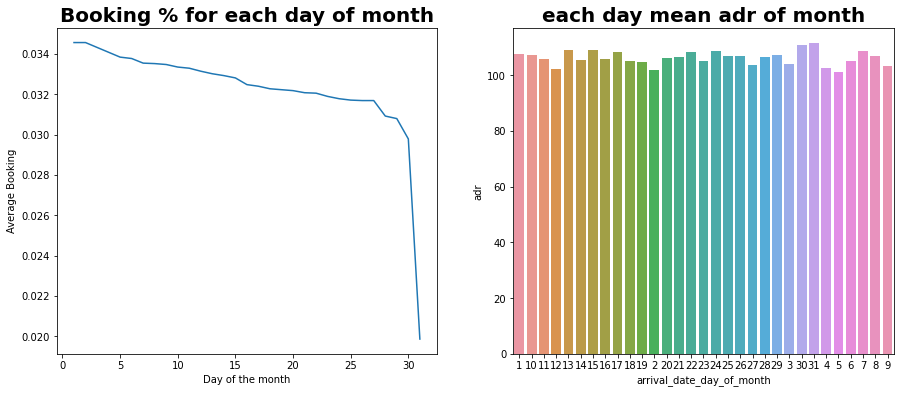

In [109]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
day_of_month=list(range(1,32))
booking_percent=df1['arrival_date_day_of_month'].value_counts(normalize=True).to_list()
plt.plot(day_of_month, booking_percent)
plt.xlabel("Day of the month")  # add X-axis label
plt.ylabel("Average Booking")  # add Y-axis label
plt.title("Booking % for each day of month",fontweight="bold", size=20)  

plt.subplot(1,2,2)
day_wise_data=df1.groupby(['arrival_date_day_of_month'])['adr'].mean().to_frame().reset_index()
sns.barplot(x='arrival_date_day_of_month',y='adr',data=day_wise_data)
plt.title('each day mean adr of month',fontweight="bold", size=20)
plt.show()


**2.What is/are the insight(s) found from the chart?**
- We can clearly see here 1st week of the month gets more bookings and booking percentage drastically decreases during last week or month end time.
- Average adr for all day of month is quite same but small peaks are during the weekends where hotel charge a little more money.  

##**Meal variable**

#**Which is most prefered meal of guests and how does it affect the revenue of hotel ?** 

In [110]:
df1.groupby('meal')['adr'].mean()  ###grouping the dataset based on meal variable and getting avg adr

meal
BB           103.540004
FB           139.795250
HB           131.710186
SC            99.054499
Undefined    103.806504
Name: adr, dtype: float64

####Chart - 15

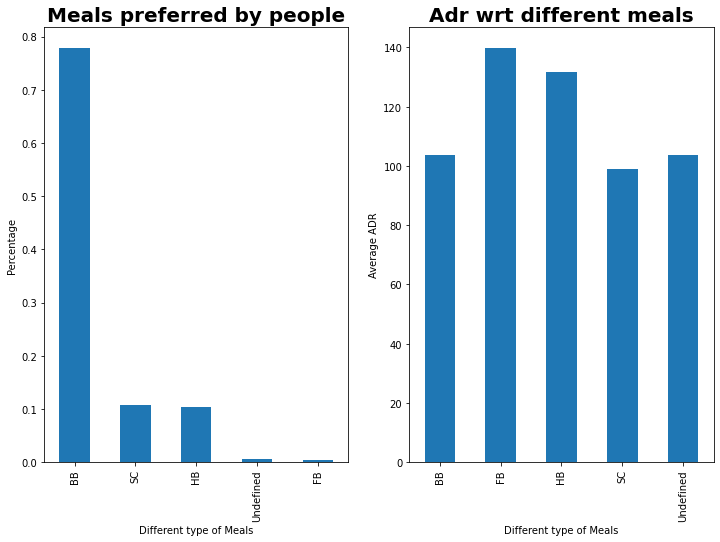

In [111]:
plt.subplot(1,2,1)
df1['meal'].value_counts(normalize=True).plot(kind='bar')  ###plotting countplot for different meals 
plt.xlabel("Different type of Meals")
plt.ylabel("Percentage")
plt.title("Meals preferred by people",fontweight="bold", size=20)

plt.subplot(1,2,2)
df1.groupby('meal')['adr'].mean() .plot(kind='bar')  ###plotting barplot for different meals and respective adr
plt.xlabel("Different type of Meals")
plt.ylabel("Average ADR")
plt.title("Adr wrt different meals",fontweight="bold", size=20)
plt.show()

**2.What is/are the insight(s) found from the chart?**
- BB (Bead and breakfast) is the most preferred meal for guests which is comes complimentary with the booking.
- FB (Full Board- Lunch,Breakfast,Dinner) is least popular because hotels charge extra price for the meal , which is clearly seen in its adr.
- HB (Half board- breakfast, dinner ),SC(Self catering) also add to the adr of hotel, thats why its less preferred. 

##**Total_stay variable**

#**How total stay duration affects adr and cancellations of hotels ?**

####Chart - 16


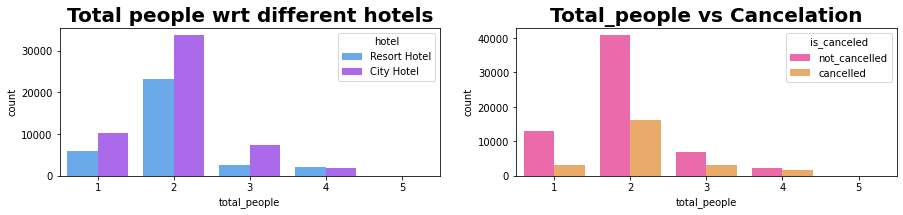

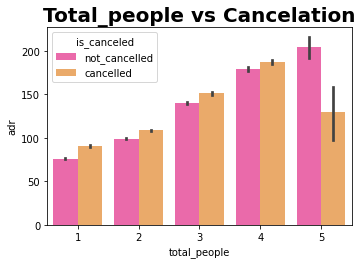

In [112]:
plt.figure(figsize=(15, 6))   ###for size of graph
plt.subplot(2, 2, 1)   ###for more than 1 sub graph
sns.countplot(x='total_people',hue='hotel', data=df1, palette='cool')  ###plotting countplot for total people variable for different hotels
plt.title("Total people wrt different hotels",fontweight="bold", size=20)   

plt.subplot(2, 2, 2)  ###graph no 2
sns.countplot(data = df1, x = 'total_people',hue='is_canceled', palette='spring')  ###plotting countplot for total people variable wrt is canceled column
plt.title('Total_people vs Cancelation',fontweight="bold", size=20)
plt.show()

plt.subplot(2, 2, 3)  ###graph no 3
sns.barplot(data = df1, x = 'total_people', y='adr',hue='is_canceled', palette='spring')
plt.title('Total_people vs Cancelation',fontweight="bold", size=20)
plt.show()


**2.What is/are the insight(s) found from the chart?**
- Mostly when there are 2 people , they are prefering city hotels
- Bookings are not cancelled mostly in case of 1 or 2 people bookings
- Adr increase with an increase in no of people

##**is_repeated_guest variable**

#**What is the percentage of repeated guests?**

####Chart - 17

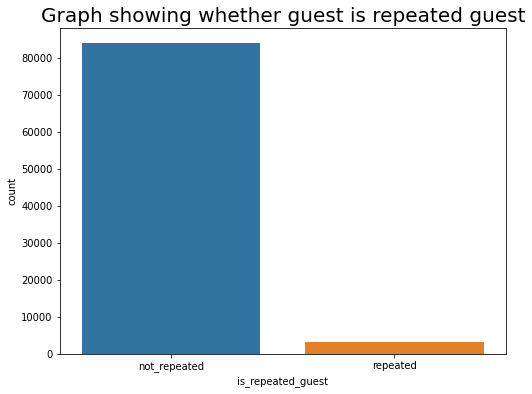

In [113]:
plt.figure(figsize=(8,6))
###plotting a countplot for repeated guest variable
sns.countplot(data = df1, x = 'is_repeated_guest').set_title('Graph showing whether guest is repeated guest', fontsize = 20)
plt.show()

**2.What is/are the insight(s) found from the chart?**
- Very less number of repeated guests.
-  A need to target repeated guests since they have booked before. 

#**Tota_of_special_requests variable**

#**In which month hotels are getting more special requests and how does it affect the adr ?**

####Chart - 18

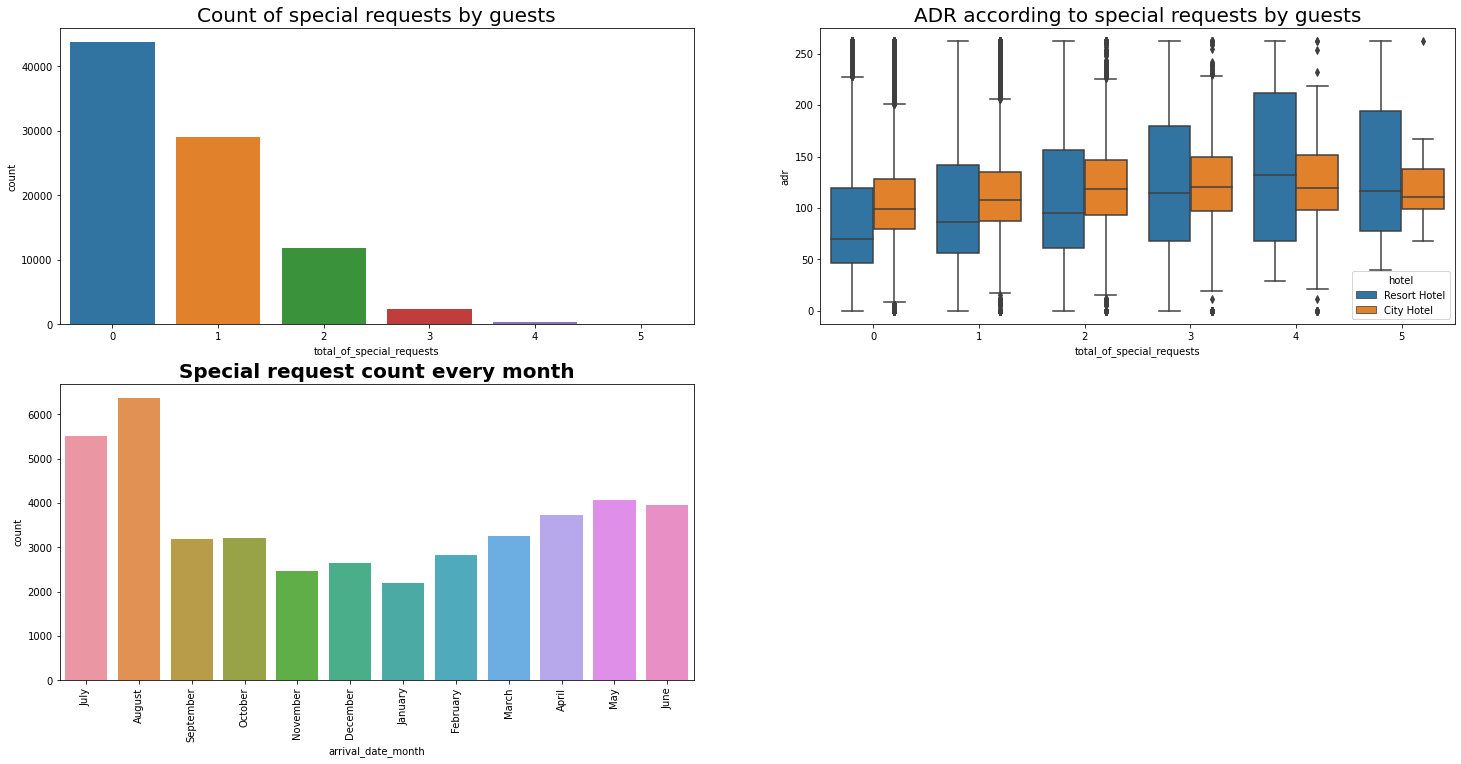

In [114]:
plt.figure(figsize=(25,12))    ###for size of graphs
plt.subplot(2,2,1)     ##for more than 1 subgraphs
sns.countplot(x='total_of_special_requests',data=df1)  ###plotting a countplot of total no of special request variable
plt.title('Count of special requests by guests', fontsize = 20)

plt.subplot(2,2,2) ##graph no 2
sns.boxplot(x='total_of_special_requests',y='adr',hue='hotel',data=df1)   ###plotting a boxplot for special request and adr wrt hotel column
plt.title('ADR according to special requests by guests', fontsize = 20)

plt.subplot(2,2,3)
monthly_special_request=df1[['total_of_special_requests','arrival_date_month']] ###taking only special request and arrival date month column
monthly_special_request=monthly_special_request[monthly_special_request['total_of_special_requests']!=0]  ###rows where requests are not = 0
sns.countplot(x='arrival_date_month', data=monthly_special_request)
plt.xticks(rotation='vertical')
plt.title('Special request count every month',fontweight='bold',fontsize=20)
plt.show()

**2.What is/are the insight(s) found from the chart?**
- Around 50% of guest dont have any special request.
- Hotels charge extra money for special requests mainly with resort hotels may be for special occassions like birthdays or weddings
- Hotels gets most special requests in the month of August,July and May.So hotels should be ready to fullfill the requests in those months accordingly. 

In [138]:
not_canceled_bookings=df1[df1['reservation_status']=='Check-Out']
canceled_bookings=df1[(df1['reservation_status']=='Canceled') & (df1['reservation_status']=='Canceled')]


###**reservation_status variable**

##**Which are the variables which make a significant difference between canceled and non- canceled bookings?**

In [159]:
print('Average Lead_time of non_canceled bookings is:',not_canceled_bookings['lead_time'].mean())
print('Average Lead_time of canceled bookings is:',canceled_bookings['lead_time'].mean())


Average Lead_time of non_canceled bookings is: 69.66813242435266
Average Lead_time of canceled bookings is: 106.81866411549835


In [160]:
print('Average ADR of non_canceled bookings is:',not_canceled_bookings['adr'].mean())
print('Average ADR of canceled bookings is:',canceled_bookings['adr'].mean())


Average ADR of non_canceled bookings is: 101.92614526818622
Average ADR of canceled bookings is: 118.0236875978431


##**Correlation heatmap**

**1. Why did you pick the specific chart?**
- The values of the first dimension appear as the rows of the table while of the second dimension as a column. 
-The color of the cell is proportional to the number of measurements that match the dimensional value. 
-This makes correlation heatmaps ideal for data analysis since it makes patterns easily readable and highlights the differences and variation in the same data.

##**Correlation heatmap for important categorical features**
- We can create correlation heatmaps for both categorical and numerical features.
- For categorical columns we can create a correlation table using pivot)table function of pandas. for this we have create another categorical column of is_canceled feature where cancelled will be rerepresented by 1 and not_cancelled will be represented by 0

In [115]:
df1['cancellation']=np.where(df1['is_canceled']=='cancelled',1,0)    ###creating a replica of is_canceled column named 'cancellation'
df1['cancellation']

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: cancellation, Length: 87230, dtype: int64

####Chart - 19

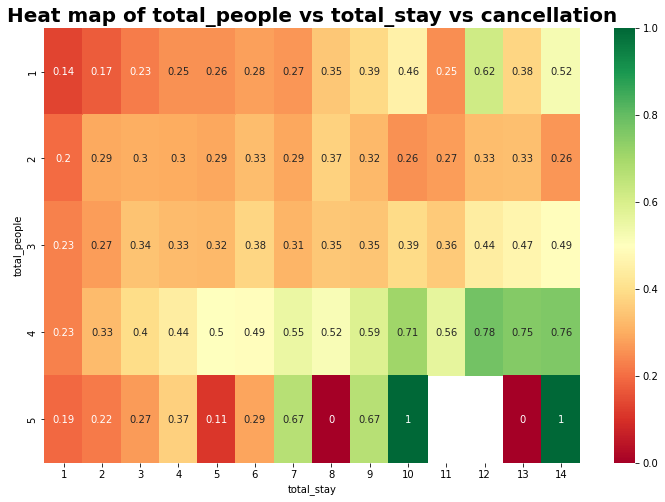

In [116]:
#creating a pivot table to create heat map of total_people vs total_stay vs cancellation
res=pd.pivot_table(df1,index='total_people',columns='total_stay',values='cancellation') ##creating correlation table
sns.heatmap(res,annot=True,cmap='RdYlGn')  ##creating heatmap of correlation table
plt.title('Heat map of total_people vs total_stay vs cancellation',fontweight='bold', fontsize=20)
plt.show()

**2.What is/are the insight(s) found from the chart?**

- There is a higher chance of cancellation when the booking is for more than 4 people and stay is for more than 8 days
- Hotels should follow up with the customers with these type of bookings so that other genuine bookings are not blocked 

####Chart - 20

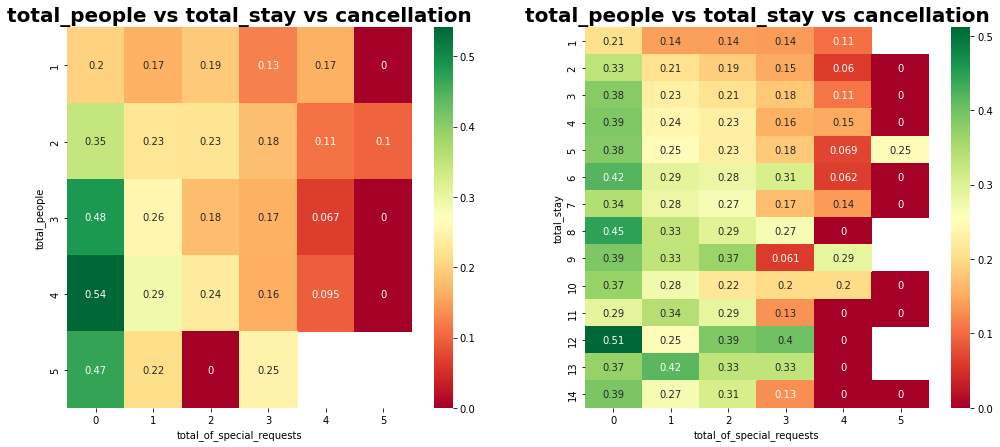

In [117]:
plt.figure(figsize=(17,7))  ##for figure size
plt.subplot(1,2,1)  ##for more than 1 subgraphs
res1=pd.pivot_table(df1,index='total_people',columns='total_of_special_requests',values='cancellation') ##creating correlation table
sns.heatmap(res1,annot=True,cmap='RdYlGn')  ##creating heatmap of correlation table
plt.title('total_people vs total_stay vs cancellation',fontweight='bold', fontsize=20)

plt.subplot(1,2,2)  ##2nd graph
res2=pd.pivot_table(df1,index='total_stay',columns='total_of_special_requests',values='cancellation') ##creating correlation table
sns.heatmap(res2,annot=True,cmap='RdYlGn')  ##creating heatmap of correlation table
plt.title('total_people vs total_stay vs cancellation',fontweight='bold', fontsize=20)
plt.show()

**2.What is/are the insight(s) found from the chart?**
- Whenever there is more no of special requests from the guests there is a high chance that the booking will not be cancelled 

##**Seaborn Heatmap for important numerical features**
- A heat map represents these coefficients to visualize the strength of correlation among variables 

Lets check the correlation using correlation matrix between important numerical features, it will give us some idea about which independent features has the potential to affect the dependent feature

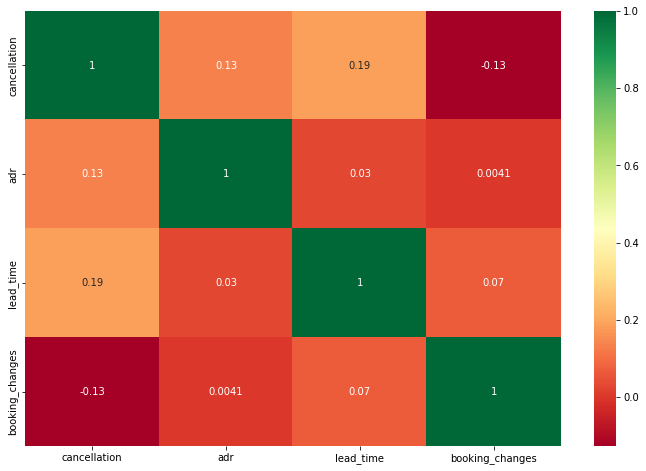

In [118]:
corr=df1[['cancellation','adr','lead_time','booking_changes']].corr()  ###correlation matrix table for important numerical features
sns.heatmap(corr, annot=True,cmap='RdYlGn')  ##creating heatmap for correlation matrix
plt.show()

**2. What is/are the insight(s) found from the chart?**
- Booking changes has a negative correlation with cancellation which means if booking changes increases it can lead to cancellation.

##**Pairplot**

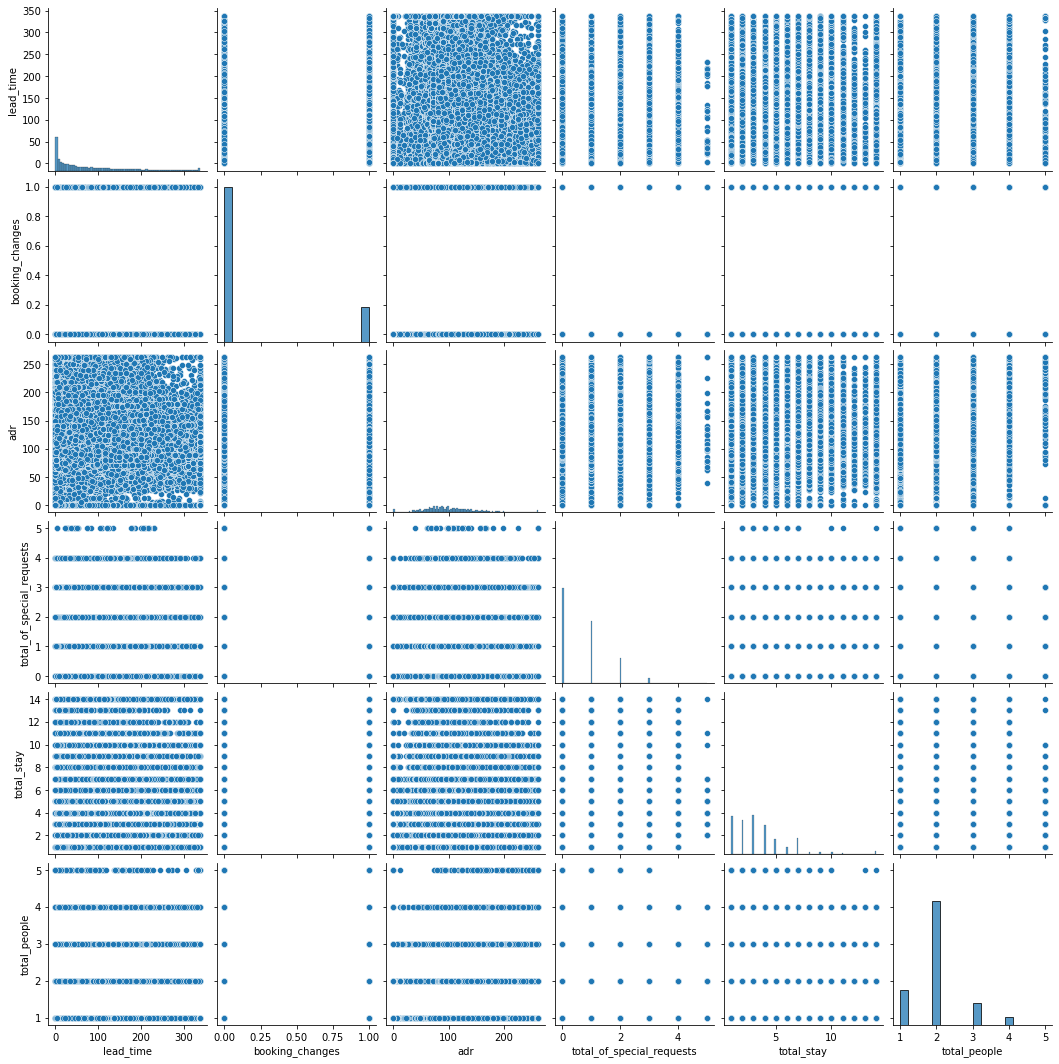

In [119]:
###creating pairplot
sns.pairplot(data=df1[['hotel', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'market_segment',
       'distribution_channel', 'booking_changes', 'deposit_type', 'customer_type', 'adr', 'total_of_special_requests',
       'reservation_status', 'total_stay',
       'total_people']])
plt.show()

Most of the features are categorical features, so not getting usefull insights with pairplot and we have already taken out all important insights with previous plots.

#**Solution to Business Objective**

####**What do you suggest the client to achieve Business Objective ?**

Hotel management can use the following suggestions :-
- Hotel management should give highest priority to give the guests a good stay experience so that no of repeated guest will increase . In case of repeated guests, they book rooms directly with the hotels without any interference of any online travel agents . This way hotel booking rates will be cheaper and hotels can save the commission money of agents.
- Hotel can take help of social media for marketing purposes, can hire travel influencers in between March and October peak months.Invest in creating a good personal branding of the hotel.
- Hotel can hire good individual agents who can pitch with corporate clients. Hotel can also collaborate with event planners .
- Hotel should be ready for any number of special requests to fullfill for guests, for which they can charge extra price also.
- Hotel can experiment with their meals.Give some extra complementary food items.Foods should be tasty .
- Hotel should give extra efforts on cleanliness, room service and hire good professional staff.
- Try to keep adr between 90-110, because it is more affordable for guests and also attracts more non canceled bookings.
- In offseason months hotels can run special offers or discounts for hotels bookings and approach the people through online marketing strategy 
- Hotel should keep no advance deposit policy. But in case of higher lead time bookings, hotels can charge upto 20%-30% cost of stay as non-refundable advance deposit because bookings with lead time more than 80 days have more chances of getting cancelled.
- Try to keep lead time less than 70 days, more than that have more chances of getting canceled.
- Hotel should follow up actively with the high lead time bookings so that genuine bookings are not put in the waiting list.


####Insufficient data

- We could have done much better analysis if we had other variables like customer ratings and reviews.
- So that we could have understood that what features of the hotels are liked by people and making them repeated customers.

#**Conclusion**